In [1]:
!pip install catboost

     -------------------------------------- 101.8/101.8 MB 5.1 MB/s eta 0:00:00
     ---------------------------------------- 47.1/47.1 kB 2.3 MB/s eta 0:00:00


In [2]:
!pip install shap

     -------------------------------------- 456.1/456.1 kB 9.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool

import shap 

import seaborn as sns
diamonds = sns.load_dataset("diamonds")

In [4]:
df = pd.DataFrame(diamonds)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [8]:
# loop on all columns and if any datatypes is object then it converts it to category for catboost.
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype("category")

In [9]:
x = df.drop(["price"], axis=1)
y = df["price"]

In [10]:
# select all the features with categories coz catboost works with categorical features
cat_features = x.select_dtypes(include=["category"]).columns.tolist()

In [11]:
cat_features

['cut', 'color', 'clarity']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size = 0.2, random_state =42)

In [13]:
model = CatBoostRegressor()


In [14]:
model.fit(x_train, y_train, cat_features = cat_features, eval_set=(x_test, y_test),plot=True )
#cat_features : passing all the categorical feature
#eval_set : evaluation set and plot used for plotting. 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.091958
0:	learn: 3679.0605125	test: 3673.6098784	best: 3673.6098784 (0)	total: 261ms	remaining: 4m 21s
1:	learn: 3401.5733100	test: 3394.0249585	best: 3394.0249585 (1)	total: 344ms	remaining: 2m 51s
2:	learn: 3153.6444895	test: 3144.5515973	best: 3144.5515973 (2)	total: 458ms	remaining: 2m 32s
3:	learn: 2931.3378369	test: 2921.1351705	best: 2921.1351705 (3)	total: 559ms	remaining: 2m 19s
4:	learn: 2730.4775852	test: 2719.4013762	best: 2719.4013762 (4)	total: 643ms	remaining: 2m 8s
5:	learn: 2555.9947939	test: 2544.6178916	best: 2544.6178916 (5)	total: 730ms	remaining: 2m
6:	learn: 2380.9723096	test: 2366.9058202	best: 2366.9058202 (6)	total: 835ms	remaining: 1m 58s
7:	learn: 2219.6192834	test: 2203.1461874	best: 2203.1461874 (7)	total: 933ms	remaining: 1m 55s
8:	learn: 2074.3103172	test: 2056.9288954	best: 2056.9288954 (8)	total: 1.01s	remaining: 1m 51s
9:	learn: 1944.7891301	test: 1927.7048085	best: 1927.7048085 (9)	total: 1.07s	remaining: 1m 46s
10:	learn: 1831

86:	learn: 588.4351859	test: 586.9228129	best: 586.9228129 (86)	total: 7.16s	remaining: 1m 15s
87:	learn: 587.5149219	test: 586.0904978	best: 586.0904978 (87)	total: 7.23s	remaining: 1m 14s
88:	learn: 586.3951950	test: 584.9949045	best: 584.9949045 (88)	total: 7.3s	remaining: 1m 14s
89:	learn: 585.6083543	test: 584.3325587	best: 584.3325587 (89)	total: 7.38s	remaining: 1m 14s
90:	learn: 584.9938659	test: 583.7054003	best: 583.7054003 (90)	total: 7.46s	remaining: 1m 14s
91:	learn: 584.3860111	test: 583.3190917	best: 583.3190917 (91)	total: 7.57s	remaining: 1m 14s
92:	learn: 583.3799275	test: 582.5662470	best: 582.5662470 (92)	total: 7.64s	remaining: 1m 14s
93:	learn: 582.8122150	test: 582.0910434	best: 582.0910434 (93)	total: 7.71s	remaining: 1m 14s
94:	learn: 582.4611820	test: 581.9267465	best: 581.9267465 (94)	total: 7.78s	remaining: 1m 14s
95:	learn: 580.1942387	test: 579.4121930	best: 579.4121930 (95)	total: 7.84s	remaining: 1m 13s
96:	learn: 579.4908488	test: 578.8145695	best: 578.

173:	learn: 541.6833210	test: 553.3168900	best: 553.3168900 (173)	total: 13.1s	remaining: 1m 2s
174:	learn: 541.6461213	test: 553.3177622	best: 553.3168900 (173)	total: 13.2s	remaining: 1m 2s
175:	learn: 541.2630621	test: 553.0540008	best: 553.0540008 (175)	total: 13.3s	remaining: 1m 2s
176:	learn: 540.8433889	test: 552.6589140	best: 552.6589140 (176)	total: 13.3s	remaining: 1m 1s
177:	learn: 540.5475830	test: 552.7241791	best: 552.6589140 (176)	total: 13.4s	remaining: 1m 1s
178:	learn: 540.2423680	test: 552.6122157	best: 552.6122157 (178)	total: 13.4s	remaining: 1m 1s
179:	learn: 539.9227936	test: 552.0560226	best: 552.0560226 (179)	total: 13.5s	remaining: 1m 1s
180:	learn: 539.7741344	test: 551.9557993	best: 551.9557993 (180)	total: 13.6s	remaining: 1m 1s
181:	learn: 539.4802285	test: 551.7160909	best: 551.7160909 (181)	total: 13.7s	remaining: 1m 1s
182:	learn: 539.0527698	test: 551.1171560	best: 551.1171560 (182)	total: 13.8s	remaining: 1m 1s
183:	learn: 538.7211325	test: 550.927958

261:	learn: 518.1453671	test: 540.5139962	best: 540.5139962 (261)	total: 19.3s	remaining: 54.4s
262:	learn: 518.1344157	test: 540.5173586	best: 540.5139962 (261)	total: 19.4s	remaining: 54.4s
263:	learn: 518.0341977	test: 540.5775018	best: 540.5139962 (261)	total: 19.5s	remaining: 54.3s
264:	learn: 517.7226408	test: 540.4950278	best: 540.4950278 (264)	total: 19.5s	remaining: 54.2s
265:	learn: 517.5923143	test: 540.4547823	best: 540.4547823 (265)	total: 19.6s	remaining: 54.1s
266:	learn: 517.4051669	test: 540.2236880	best: 540.2236880 (266)	total: 19.7s	remaining: 54s
267:	learn: 516.9141129	test: 540.0731769	best: 540.0731769 (267)	total: 19.7s	remaining: 53.9s
268:	learn: 516.6916056	test: 539.9305930	best: 539.9305930 (268)	total: 19.8s	remaining: 53.8s
269:	learn: 516.4008402	test: 539.6983394	best: 539.6983394 (269)	total: 19.9s	remaining: 53.7s
270:	learn: 516.2538548	test: 539.6399008	best: 539.6399008 (270)	total: 19.9s	remaining: 53.6s
271:	learn: 515.9581350	test: 539.5146752	

347:	learn: 504.3020038	test: 534.1092474	best: 534.1092474 (347)	total: 25.2s	remaining: 47.2s
348:	learn: 504.0983243	test: 534.0149594	best: 534.0149594 (348)	total: 25.3s	remaining: 47.1s
349:	learn: 504.0951200	test: 534.0150846	best: 534.0149594 (348)	total: 25.3s	remaining: 47.1s
350:	learn: 504.0210692	test: 533.9368272	best: 533.9368272 (350)	total: 25.4s	remaining: 47s
351:	learn: 503.9625225	test: 533.9165899	best: 533.9165899 (351)	total: 25.5s	remaining: 46.9s
352:	learn: 503.7739632	test: 533.8734362	best: 533.8734362 (352)	total: 25.6s	remaining: 46.8s
353:	learn: 503.6269369	test: 533.8871392	best: 533.8734362 (352)	total: 25.6s	remaining: 46.8s
354:	learn: 503.5178674	test: 533.7966122	best: 533.7966122 (354)	total: 25.7s	remaining: 46.7s
355:	learn: 503.2944815	test: 533.7546905	best: 533.7546905 (355)	total: 25.8s	remaining: 46.6s
356:	learn: 503.1653033	test: 533.6720680	best: 533.6720680 (356)	total: 25.8s	remaining: 46.5s
357:	learn: 503.0075835	test: 533.6771845	

435:	learn: 492.1886874	test: 530.3815138	best: 530.3815138 (435)	total: 31.5s	remaining: 40.8s
436:	learn: 491.9223777	test: 530.4098375	best: 530.3815138 (435)	total: 31.6s	remaining: 40.7s
437:	learn: 491.8007379	test: 530.4628026	best: 530.3815138 (435)	total: 31.6s	remaining: 40.6s
438:	learn: 491.6559289	test: 530.3892224	best: 530.3815138 (435)	total: 31.7s	remaining: 40.5s
439:	learn: 491.6035169	test: 530.3425585	best: 530.3425585 (439)	total: 31.8s	remaining: 40.5s
440:	learn: 491.3553185	test: 530.3167852	best: 530.3167852 (440)	total: 31.9s	remaining: 40.4s
441:	learn: 491.3477392	test: 530.3086647	best: 530.3086647 (441)	total: 31.9s	remaining: 40.3s
442:	learn: 491.3296254	test: 530.3146938	best: 530.3086647 (441)	total: 32s	remaining: 40.2s
443:	learn: 490.9678158	test: 529.9509335	best: 529.9509335 (443)	total: 32.1s	remaining: 40.1s
444:	learn: 490.9269806	test: 529.9252954	best: 529.9252954 (444)	total: 32.1s	remaining: 40.1s
445:	learn: 490.8637007	test: 529.9173888	

523:	learn: 481.7040315	test: 527.9848855	best: 527.8281409 (521)	total: 37.7s	remaining: 34.2s
524:	learn: 481.6902398	test: 527.9678172	best: 527.8281409 (521)	total: 37.8s	remaining: 34.2s
525:	learn: 481.5642003	test: 527.9145616	best: 527.8281409 (521)	total: 37.8s	remaining: 34.1s
526:	learn: 481.4179433	test: 527.8913858	best: 527.8281409 (521)	total: 37.9s	remaining: 34s
527:	learn: 481.1917591	test: 527.9155085	best: 527.8281409 (521)	total: 38s	remaining: 34s
528:	learn: 481.0383869	test: 527.9879661	best: 527.8281409 (521)	total: 38.1s	remaining: 33.9s
529:	learn: 480.8129734	test: 528.0906869	best: 527.8281409 (521)	total: 38.1s	remaining: 33.8s
530:	learn: 480.7309059	test: 528.1440267	best: 527.8281409 (521)	total: 38.2s	remaining: 33.7s
531:	learn: 480.7277995	test: 528.1411641	best: 527.8281409 (521)	total: 38.3s	remaining: 33.7s
532:	learn: 480.5916913	test: 528.1552949	best: 527.8281409 (521)	total: 38.3s	remaining: 33.6s
533:	learn: 480.3543866	test: 528.1471714	best

609:	learn: 471.6588327	test: 526.4403101	best: 526.4076383 (598)	total: 43.6s	remaining: 27.9s
610:	learn: 471.6031125	test: 526.3938171	best: 526.3938171 (610)	total: 43.7s	remaining: 27.8s
611:	learn: 471.4181510	test: 526.3485753	best: 526.3485753 (611)	total: 43.7s	remaining: 27.7s
612:	learn: 471.2784047	test: 526.3145322	best: 526.3145322 (612)	total: 43.8s	remaining: 27.7s
613:	learn: 471.1819956	test: 526.3557843	best: 526.3145322 (612)	total: 43.9s	remaining: 27.6s
614:	learn: 471.1573159	test: 526.3585730	best: 526.3145322 (612)	total: 43.9s	remaining: 27.5s
615:	learn: 471.0693157	test: 526.3044676	best: 526.3044676 (615)	total: 44s	remaining: 27.4s
616:	learn: 470.9801103	test: 526.2962030	best: 526.2962030 (616)	total: 44s	remaining: 27.3s
617:	learn: 470.7590721	test: 526.3036066	best: 526.2962030 (616)	total: 44.1s	remaining: 27.3s
618:	learn: 470.6005340	test: 526.1952678	best: 526.1952678 (618)	total: 44.2s	remaining: 27.2s
619:	learn: 470.5091652	test: 526.1827796	be

696:	learn: 464.4040717	test: 525.0102289	best: 525.0001822 (670)	total: 49.9s	remaining: 21.7s
697:	learn: 464.3481573	test: 525.0131068	best: 525.0001822 (670)	total: 50s	remaining: 21.6s
698:	learn: 464.3151414	test: 525.0323919	best: 525.0001822 (670)	total: 50s	remaining: 21.6s
699:	learn: 464.0491054	test: 524.8448709	best: 524.8448709 (699)	total: 50.1s	remaining: 21.5s
700:	learn: 463.9048873	test: 524.7736359	best: 524.7736359 (700)	total: 50.2s	remaining: 21.4s
701:	learn: 463.8757349	test: 524.7462460	best: 524.7462460 (701)	total: 50.3s	remaining: 21.4s
702:	learn: 463.7013157	test: 524.7255829	best: 524.7255829 (702)	total: 50.4s	remaining: 21.3s
703:	learn: 463.6273670	test: 524.6955645	best: 524.6955645 (703)	total: 50.5s	remaining: 21.2s
704:	learn: 463.4817365	test: 524.6749730	best: 524.6749730 (704)	total: 50.5s	remaining: 21.1s
705:	learn: 463.2755189	test: 524.7024589	best: 524.6749730 (704)	total: 50.6s	remaining: 21.1s
706:	learn: 463.0740237	test: 524.7808976	be

784:	learn: 456.4448270	test: 523.1435378	best: 523.1413131 (781)	total: 55.9s	remaining: 15.3s
785:	learn: 456.3021274	test: 523.0992885	best: 523.0992885 (785)	total: 55.9s	remaining: 15.2s
786:	learn: 456.2195629	test: 523.1135865	best: 523.0992885 (785)	total: 56s	remaining: 15.2s
787:	learn: 456.2159081	test: 523.1141014	best: 523.0992885 (785)	total: 56.1s	remaining: 15.1s
788:	learn: 456.1695523	test: 523.0752422	best: 523.0752422 (788)	total: 56.1s	remaining: 15s
789:	learn: 456.1311953	test: 523.0616706	best: 523.0616706 (789)	total: 56.2s	remaining: 14.9s
790:	learn: 456.0817515	test: 523.0434398	best: 523.0434398 (790)	total: 56.3s	remaining: 14.9s
791:	learn: 456.0202004	test: 522.9941964	best: 522.9941964 (791)	total: 56.3s	remaining: 14.8s
792:	learn: 455.9337866	test: 523.0053317	best: 522.9941964 (791)	total: 56.4s	remaining: 14.7s
793:	learn: 455.8430909	test: 522.9638017	best: 522.9638017 (793)	total: 56.5s	remaining: 14.7s
794:	learn: 455.8406100	test: 522.9644133	be

872:	learn: 449.4293852	test: 522.4442375	best: 522.4408167 (867)	total: 1m 2s	remaining: 9.13s
873:	learn: 449.3899150	test: 522.4334151	best: 522.4334151 (873)	total: 1m 2s	remaining: 9.06s
874:	learn: 449.3793807	test: 522.4403980	best: 522.4334151 (873)	total: 1m 2s	remaining: 8.99s
875:	learn: 449.3131161	test: 522.4659350	best: 522.4334151 (873)	total: 1m 2s	remaining: 8.91s
876:	learn: 449.2697684	test: 522.4403387	best: 522.4334151 (873)	total: 1m 3s	remaining: 8.84s
877:	learn: 449.1789831	test: 522.3542659	best: 522.3542659 (877)	total: 1m 3s	remaining: 8.77s
878:	learn: 449.0972850	test: 522.3500074	best: 522.3500074 (878)	total: 1m 3s	remaining: 8.7s
879:	learn: 449.0733373	test: 522.3297396	best: 522.3297396 (879)	total: 1m 3s	remaining: 8.63s
880:	learn: 448.9959936	test: 522.2811478	best: 522.2811478 (880)	total: 1m 3s	remaining: 8.55s
881:	learn: 448.7877771	test: 522.2720645	best: 522.2720645 (881)	total: 1m 3s	remaining: 8.48s
882:	learn: 448.6122880	test: 522.2594600

958:	learn: 442.5108208	test: 521.4682625	best: 521.3824050 (950)	total: 1m 8s	remaining: 2.94s
959:	learn: 442.4483460	test: 521.4637154	best: 521.3824050 (950)	total: 1m 8s	remaining: 2.87s
960:	learn: 442.3075280	test: 521.4639644	best: 521.3824050 (950)	total: 1m 8s	remaining: 2.8s
961:	learn: 442.2138990	test: 521.4177084	best: 521.3824050 (950)	total: 1m 9s	remaining: 2.73s
962:	learn: 442.1033399	test: 521.4648865	best: 521.3824050 (950)	total: 1m 9s	remaining: 2.65s
963:	learn: 442.0673073	test: 521.4305984	best: 521.3824050 (950)	total: 1m 9s	remaining: 2.58s
964:	learn: 441.8630120	test: 521.3688847	best: 521.3688847 (964)	total: 1m 9s	remaining: 2.51s
965:	learn: 441.7551113	test: 521.3465260	best: 521.3465260 (965)	total: 1m 9s	remaining: 2.44s
966:	learn: 441.6244920	test: 521.3701824	best: 521.3465260 (965)	total: 1m 9s	remaining: 2.37s
967:	learn: 441.4636780	test: 521.4146039	best: 521.3465260 (965)	total: 1m 9s	remaining: 2.3s
968:	learn: 441.4422485	test: 521.4120971	

In [15]:
preds= model.predict(x_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,preds)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 271669.358215927


### External SHAP

In [16]:
# initialize the SHAP explainer
explainer = shap.Explainer(model)

In [17]:
#compute SHAP values for the test set
shap_values = explainer(x_test)

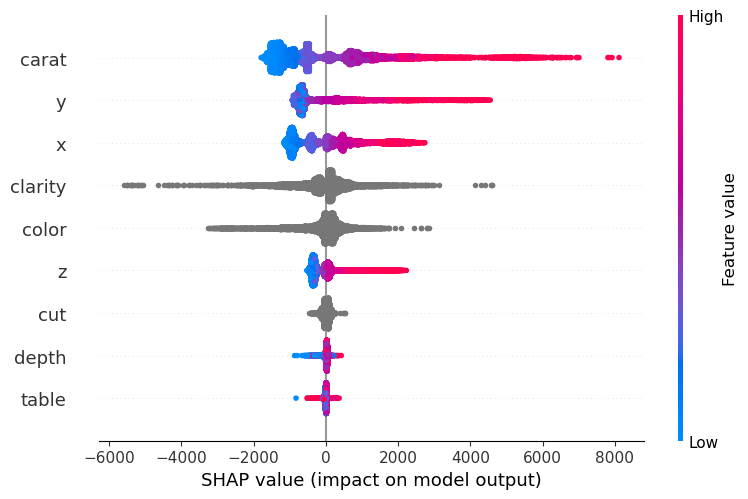

In [20]:
shap.summary_plot(shap_values, x_test)

In [22]:
shap_df = pd.DataFrame(shap_values.values, columns = x_test.columns)

In [23]:
shap_df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1574.629835,44.892785,-56.135164,326.623944,16.892017,0.618931,-1113.559659,-644.331023,-385.359206
1,-629.276131,-55.574322,167.997611,464.215022,-42.690696,-14.781624,-451.909738,-765.770836,-373.102424
2,-1255.435497,61.268752,214.370696,308.272671,16.128612,-3.586441,-980.125058,-738.375212,-361.135538
3,-1245.055498,-23.090137,229.352562,329.989963,6.084816,-10.549683,-811.609673,-733.516037,-357.958929
4,2429.900333,53.938865,656.091387,-2107.307242,7.242352,33.838297,1773.698464,2038.180422,798.820742


### In build SHAP

In [26]:

shap_values = model.get_feature_importance(type = 'ShapValues', data = Pool(x_test, label = y_test, cat_features=cat_features))

shap_values = np.array(shap_values)[:,:-1]

shap_df = pd.DataFrame(shap_values, columns = x_test.columns)

shap_df.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1574.629835,44.892785,-56.135164,326.623944,16.892017,0.618931,-1113.559659,-644.331023,-385.359206
1,-629.276131,-55.574322,167.997611,464.215022,-42.690696,-14.781624,-451.909738,-765.770836,-373.102424
2,-1255.435497,61.268752,214.370696,308.272671,16.128612,-3.586441,-980.125058,-738.375212,-361.135538
3,-1245.055498,-23.090137,229.352562,329.989963,6.084816,-10.549683,-811.609673,-733.516037,-357.958929
4,2429.900333,53.938865,656.091387,-2107.307242,7.242352,33.838297,1773.698464,2038.180422,798.820742
